In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import os
import sys

In [14]:
try:
    import ipykernel
    from ipykernel import get_connection_info
    import json
    import glob
    import jupyter_client

    # Attempt to find the notebook's directory via the kernel's connection file
    kernel_id = get_connection_info()['id']
    cf_dir = os.path.dirname(jupyter_client.find_connection_file(kernel_id))
    notebook_files = glob.glob(os.path.join(cf_dir, '*.ipynb'))
    if notebook_files:
        current_notebook_dir = os.path.dirname(notebook_files[0])
    else:
        current_notebook_dir = os.getcwd() # Fallback if .ipynb not found this way
except Exception:
    current_notebook_dir = os.getcwd() # Most robust fallback: rely on where Jupyter was launched

In [15]:
project_root = os.path.abspath(os.path.join(current_notebook_dir, '..'))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added '{src_path}' to Python path to find our modules.")

# Now we can comfortably import our data loader
from data_loader import load_lidar_data

# Pinpointing where our data lives
data_dir = os.path.join(project_root, 'data')

if not os.path.exists(data_dir):
    print(f"Heads up! Data directory not found at '{data_dir}'. Make sure your .parquet files are in the 'data/' folder relative to your project root.")
else:
    print(f"Data directory found: '{data_dir}'")

print("All set with imports and path configurations!")

Added '/Users/adeshgaurav/Documents/Projects/LiDAR /src' to Python path to find our modules.
Data directory found: '/Users/adeshgaurav/Documents/Projects/LiDAR /data'
All set with imports and path configurations!


In [16]:
print("Time to load up those LiDAR point clouds. This might take a moment for the larger files...")

file_specs = {
    "easy": "lidar_cable_points_easy.parquet",
    "medium": "lidar_cable_points_medium.parquet",
    "hard": "lidar_cable_points_hard.parquet",
    "extrahard": "lidar_cable_points_extrahard.parquet"
}

lidar_dataframes = {}

for name, filename in file_specs.items():
    file_path = os.path.join(data_dir, filename)
    try:
        df = load_lidar_data(file_path)
        lidar_dataframes[name] = df
        print(f"  --> Successfully loaded '{filename}'. It contains {len(df):,} points.")
    except Exception as e:
        print(f"  X Error loading '{filename}': {e}. Skipping this one for now.")
        lidar_dataframes[name] = pd.DataFrame() # Add an empty DataFrame to avoid downstream errors

print("\nAll specified datasets (attempted to be) loaded. Let's see what we've got!")

Time to load up those LiDAR point clouds. This might take a moment for the larger files...
  --> Successfully loaded 'lidar_cable_points_easy.parquet'. It contains 1,502 points.
  --> Successfully loaded 'lidar_cable_points_medium.parquet'. It contains 2,803 points.
  --> Successfully loaded 'lidar_cable_points_hard.parquet'. It contains 601 points.
  --> Successfully loaded 'lidar_cable_points_extrahard.parquet'. It contains 1,201 points.

All specified datasets (attempted to be) loaded. Let's see what we've got!


In [17]:
print("--- Initial Data Snapshot ---")
for name, df in lidar_dataframes.items():
    if not df.empty:
        print(f"\n--- Dataset: {name.upper()} ---")
        print(f"  Total points: {len(df):,}")
        print(f"  Columns available: {df.columns.tolist()}")
        print("  Quick statistical summary:")
        print(df.describe().to_string()) # .to_string() for better display in notebooks
        print(f"  Any missing values?:\n{df.isnull().sum().to_string()}")
    else:
        print(f"\n--- Dataset: {name.upper()} (Empty or failed to load) - Skipping detailed inspection ---")

print("\nInitial checks complete. Now for some visuals!")

--- Initial Data Snapshot ---

--- Dataset: EASY ---
  Total points: 1,502
  Columns available: ['x', 'y', 'z']
  Quick statistical summary:
                 x            y            z
count  1502.000000  1502.000000  1502.000000
mean      0.103807    -0.186761    10.506456
std       6.860583    12.517748     0.460115
min     -12.749286   -22.386120     9.950736
25%      -5.811606   -10.936971    10.092309
50%       0.182992    -0.506426    10.378612
75%       5.905952    10.778874    10.854110
max      12.778636    22.128342    11.630552
  Any missing values?:
x    0
y    0
z    0

--- Dataset: MEDIUM ---
  Total points: 2,803
  Columns available: ['x', 'y', 'z']
  Quick statistical summary:
                 x            y            z
count  2803.000000  2803.000000  2803.000000
mean      0.093127    -0.152926     8.649221
std       6.989257    12.680496     1.731510
min     -13.079266   -22.605589     6.400864
25%      -5.868994   -11.210974     6.911245
50%       0.142885    -0.03


--- Static 3D Point Cloud Visualizations (Matplotlib) ---
These give us a quick, un-interactive sense of the overall shape.


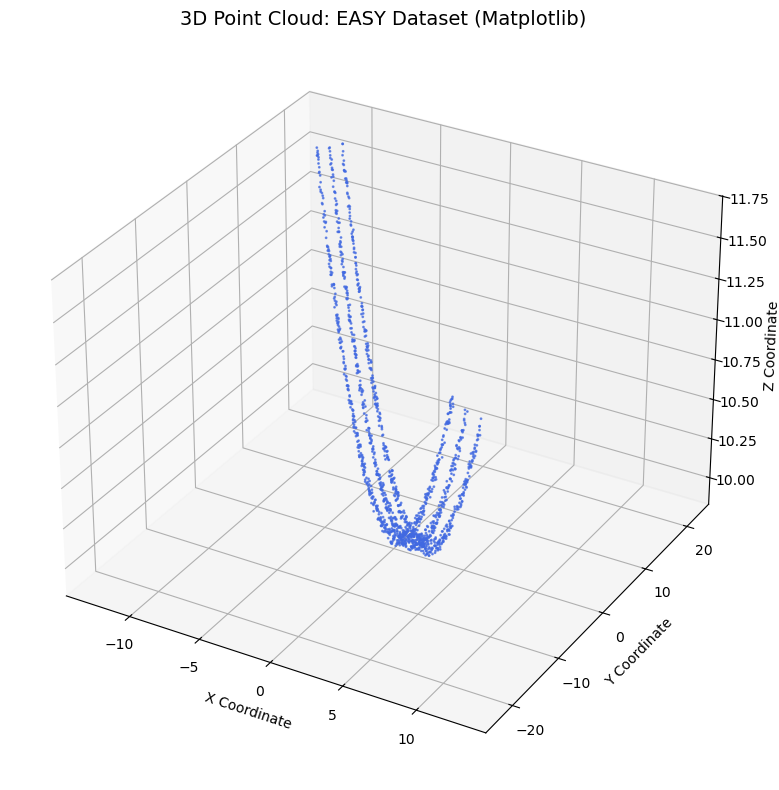

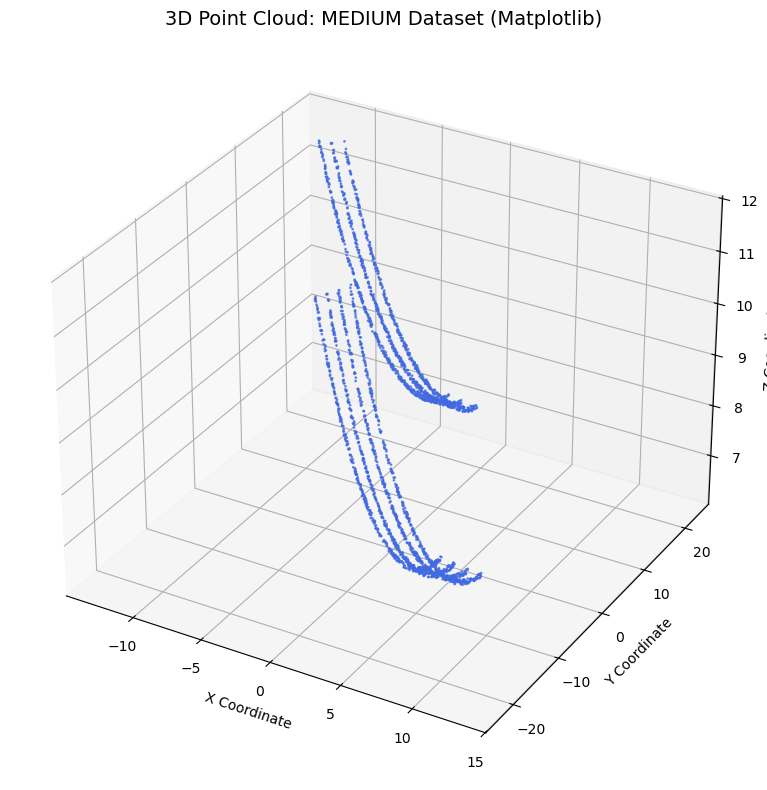

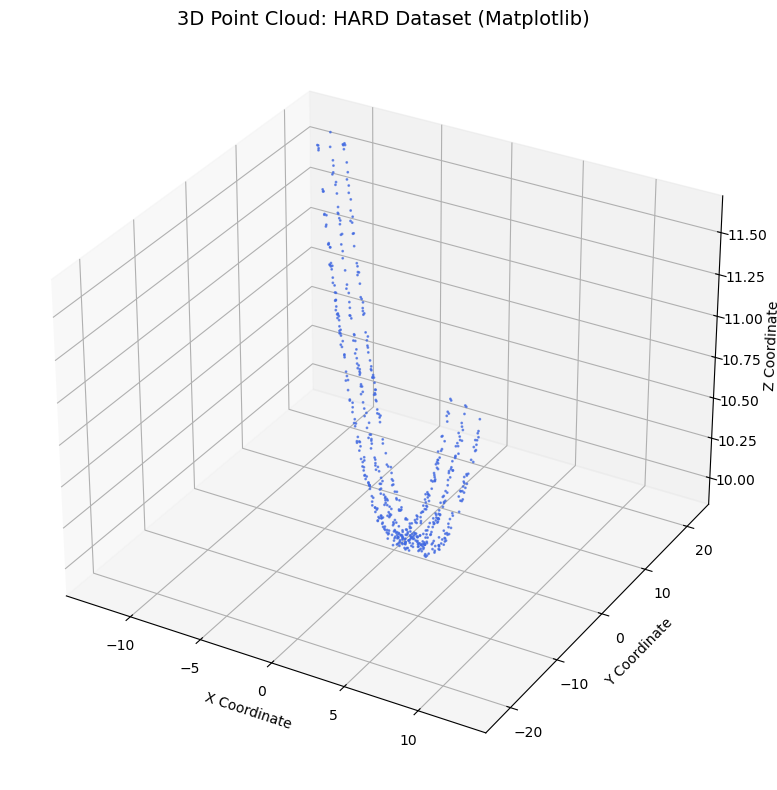

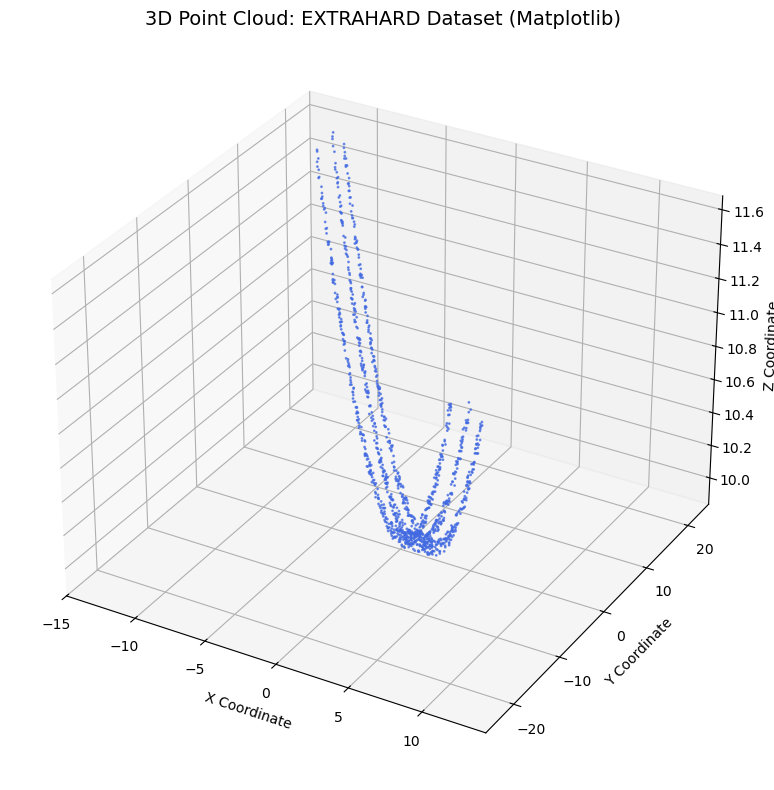

In [18]:
print("\n--- Static 3D Point Cloud Visualizations (Matplotlib) ---")
print("These give us a quick, un-interactive sense of the overall shape.")

for name, df in lidar_dataframes.items():
    if not df.empty:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df['x'], df['y'], df['z'], s=1, alpha=0.7, c='royalblue') # Using a consistent color
        ax.set_title(f'3D Point Cloud: {name.upper()} Dataset (Matplotlib)', fontsize=14)
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_zlabel('Z Coordinate')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping Matplotlib 3D plot for empty dataset: {name.upper()}")

In [19]:
print("\n--- Interactive 3D Point Cloud Visualizations (Plotly) ---")
print("Plotly lets us zoom, pan, and rotate – essential for understanding spatial arrangements!")

for name, df in lidar_dataframes.items():
    if not df.empty:
        fig = go.Figure(data=[go.Scatter3d(
            x=df['x'],
            y=df['y'],
            z=df['z'],
            mode='markers',
            marker=dict(
                size=2,
                opacity=0.8,
                color='darkorange' # Another distinct color
            )
        )])
        fig.update_layout(
            title=f'Interactive 3D Point Cloud: {name.upper()} Dataset (Plotly)',
            scene=dict(
                xaxis_title='X Coordinate',
                yaxis_title='Y Coordinate',
                zaxis_title='Z Coordinate',
                aspectmode='data' # This helps maintain true proportions
            ),
            height=700,
            width=800
        )
        fig.show()
    else:
        print(f"Skipping Plotly 3D plot for empty dataset: {name.upper()}")


--- Interactive 3D Point Cloud Visualizations (Plotly) ---
Plotly lets us zoom, pan, and rotate – essential for understanding spatial arrangements!



--- Diving into 2D Projections (XY, XZ, YZ) ---
These views are crucial for spotting wire separation, sag, and overall shape from different angles.


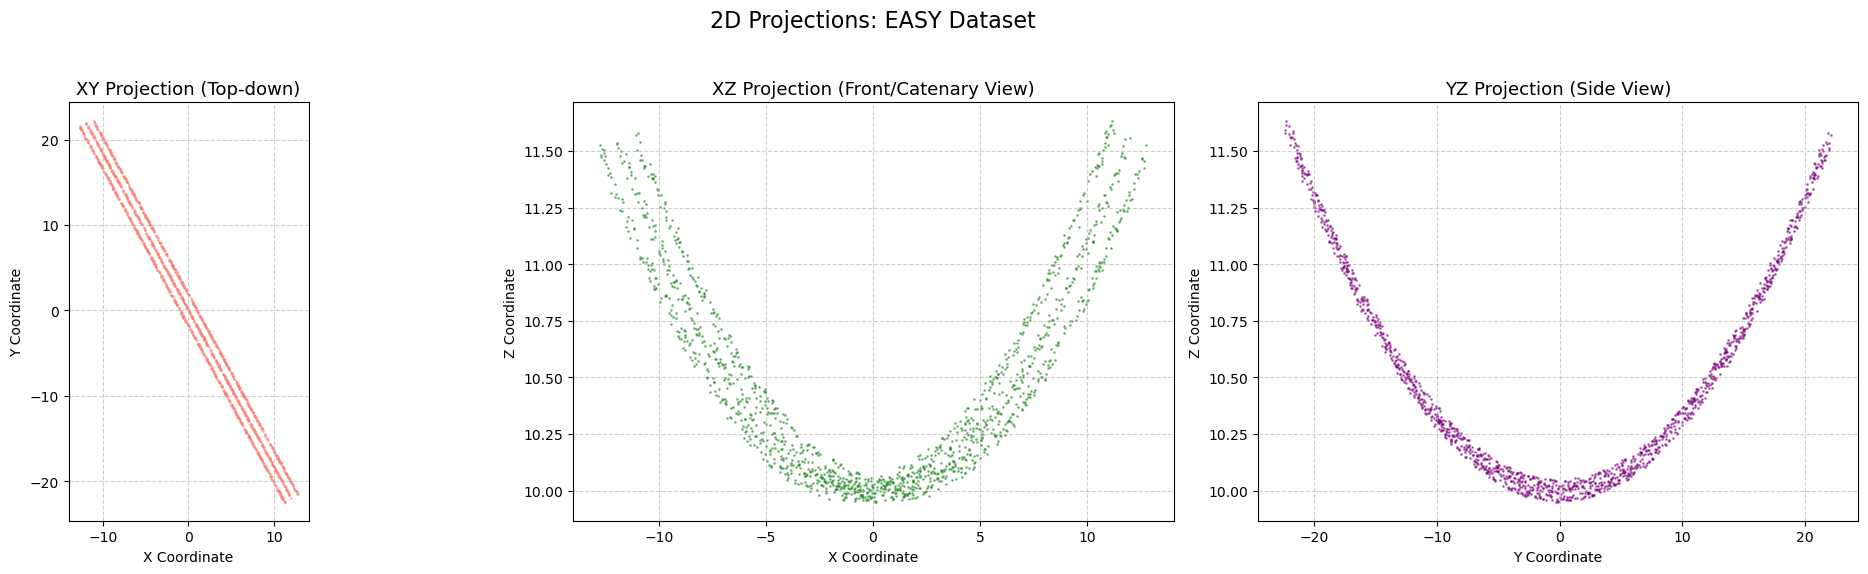

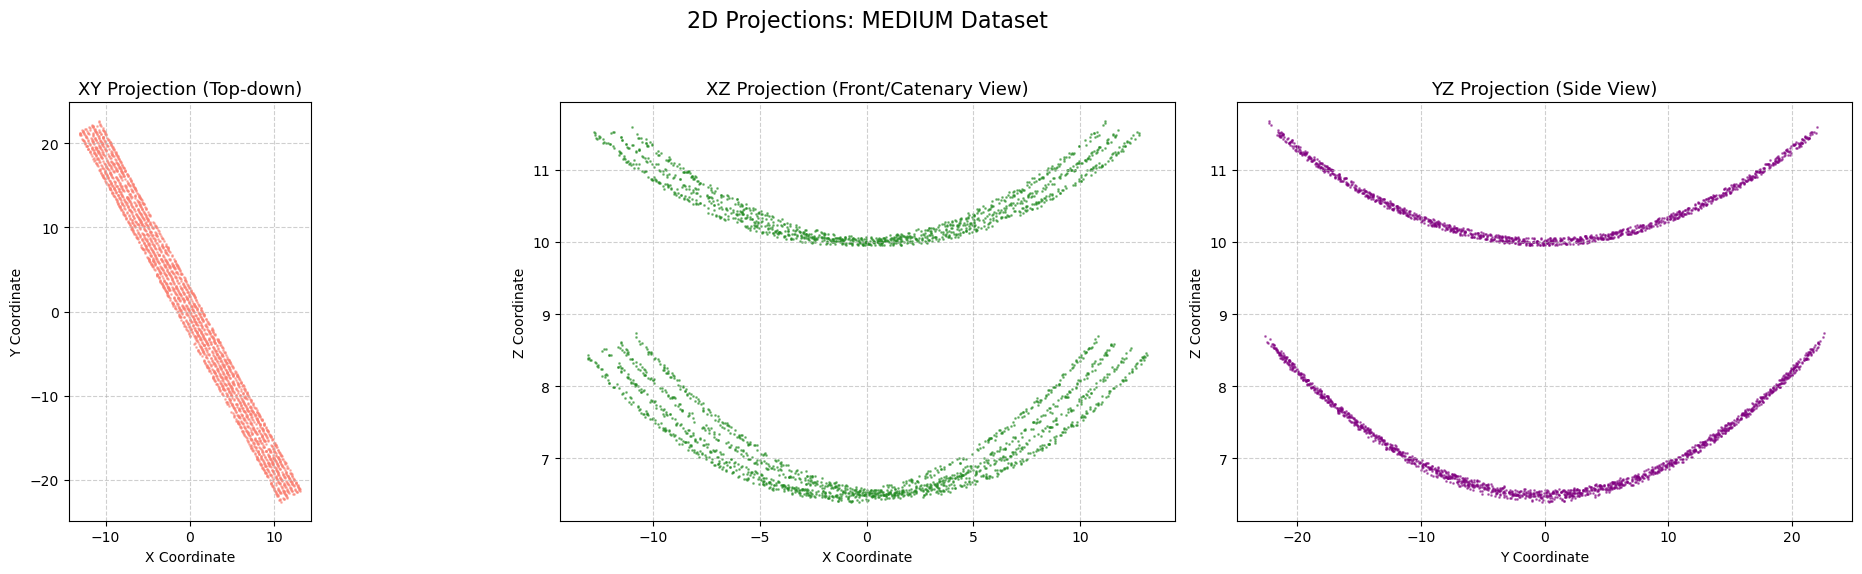

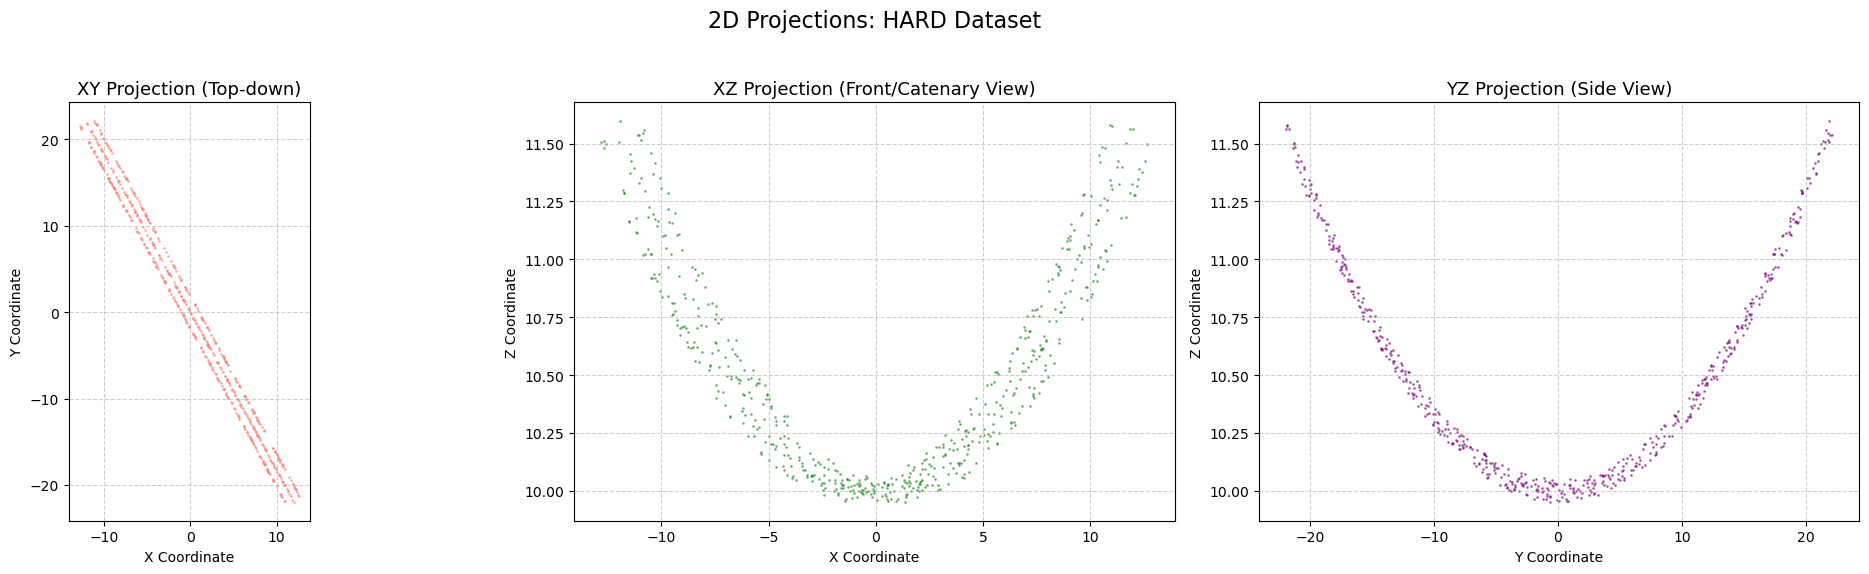

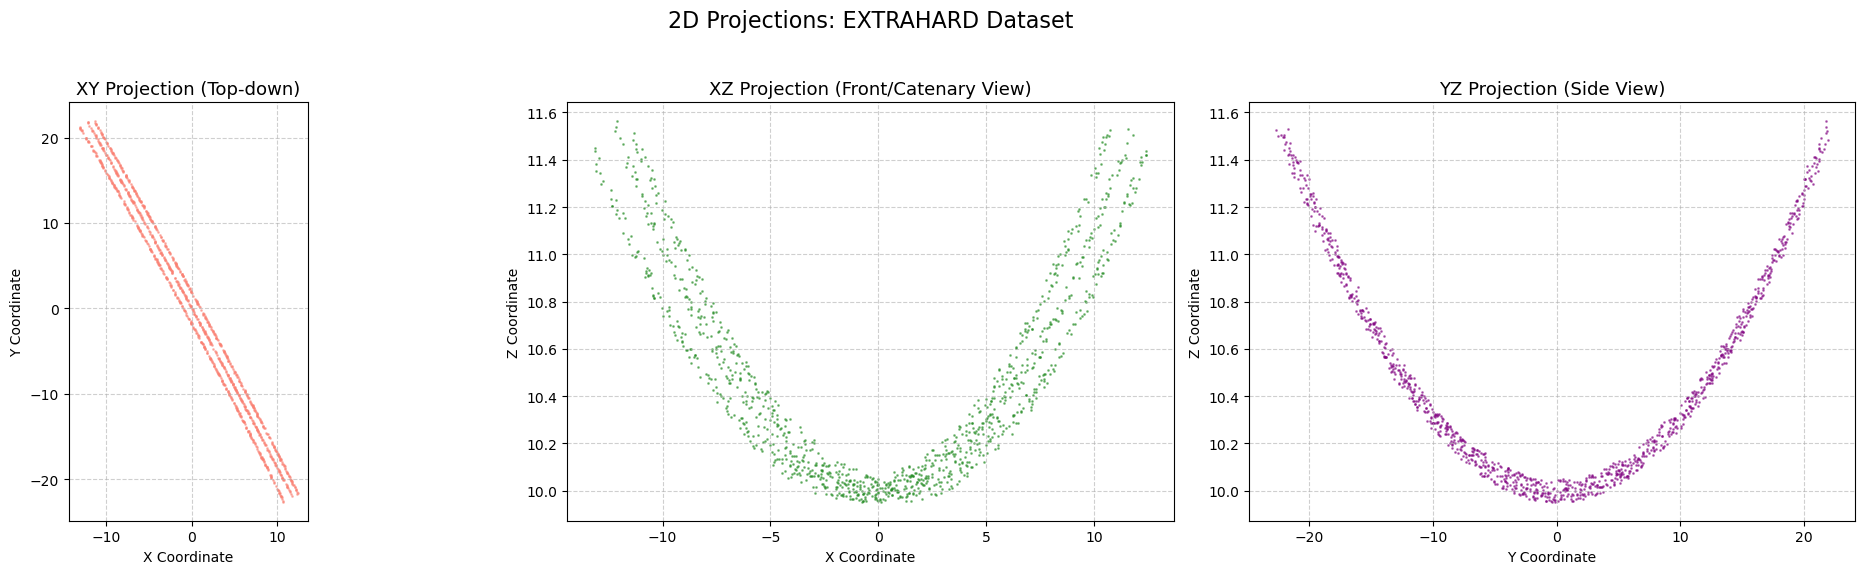

In [20]:
print("\n--- Diving into 2D Projections (XY, XZ, YZ) ---")
print("These views are crucial for spotting wire separation, sag, and overall shape from different angles.")

for name, df in lidar_dataframes.items():
    if not df.empty:
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'2D Projections: {name.upper()} Dataset', fontsize=16)

        # XY Projection (Top-down view): Are wires distinct from above?
        axes[0].scatter(df['x'], df['y'], s=1, alpha=0.5, color='salmon')
        axes[0].set_title('XY Projection (Top-down)', fontsize=13)
        axes[0].set_xlabel('X Coordinate')
        axes[0].set_ylabel('Y Coordinate')
        axes[0].set_aspect('equal', adjustable='box') # Keep it true to scale
        axes[0].grid(True, linestyle='--', alpha=0.6)

        # XZ Projection (Front view): This is where we expect to see the catenary sag!
        axes[1].scatter(df['x'], df['z'], s=1, alpha=0.5, color='forestgreen')
        axes[1].set_title('XZ Projection (Front/Catenary View)', fontsize=13)
        axes[1].set_xlabel('X Coordinate')
        axes[1].set_ylabel('Z Coordinate')
        axes[1].set_aspect('auto', adjustable='box') # Auto aspect often better for showing sag visually
        axes[1].grid(True, linestyle='--', alpha=0.6)

        # YZ Projection (Side view): How do wires look from the side?
        axes[2].scatter(df['y'], df['z'], s=1, alpha=0.5, color='purple')
        axes[2].set_title('YZ Projection (Side View)', fontsize=13)
        axes[2].set_xlabel('Y Coordinate')
        axes[2].set_ylabel('Z Coordinate')
        axes[2].set_aspect('auto', adjustable='box')
        axes[2].grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
        plt.show()
    else:
        print(f"Skipping 2D projection plots for empty dataset: {name.upper()}")


--- Box Plots of Coordinates: Spotting Outliers and Range ---
These plots highlight the spread of points and reveal extreme outliers in each dimension, which might be noise.


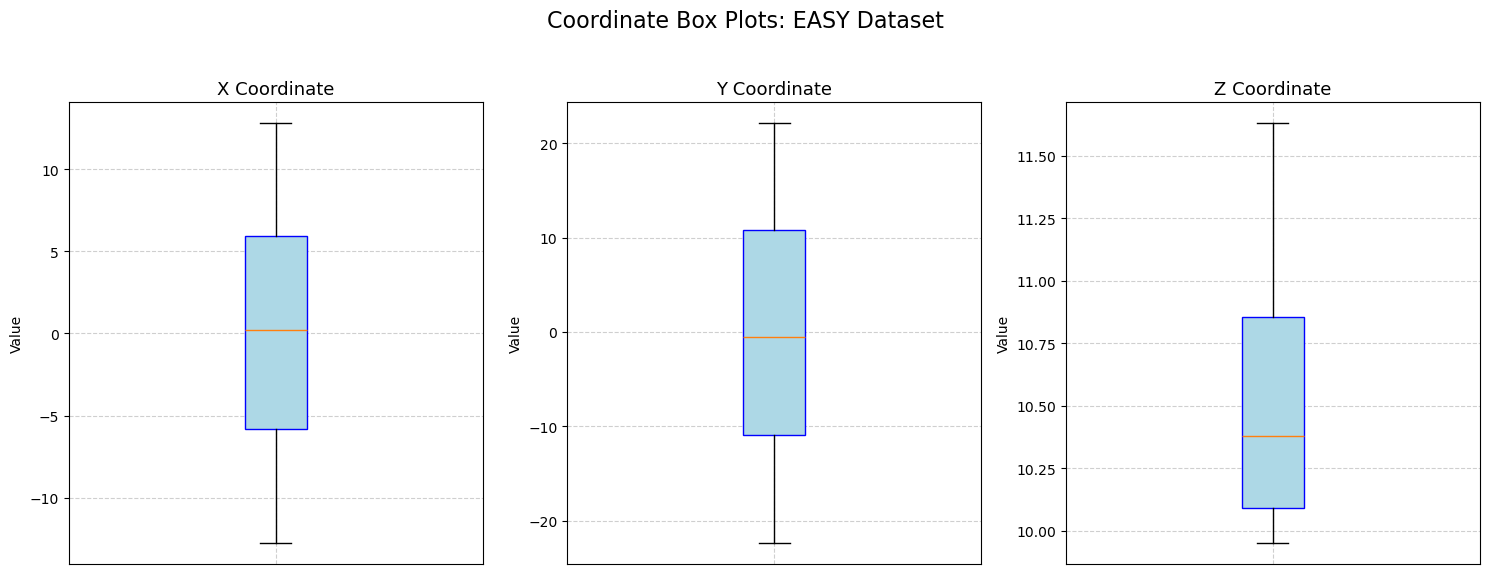

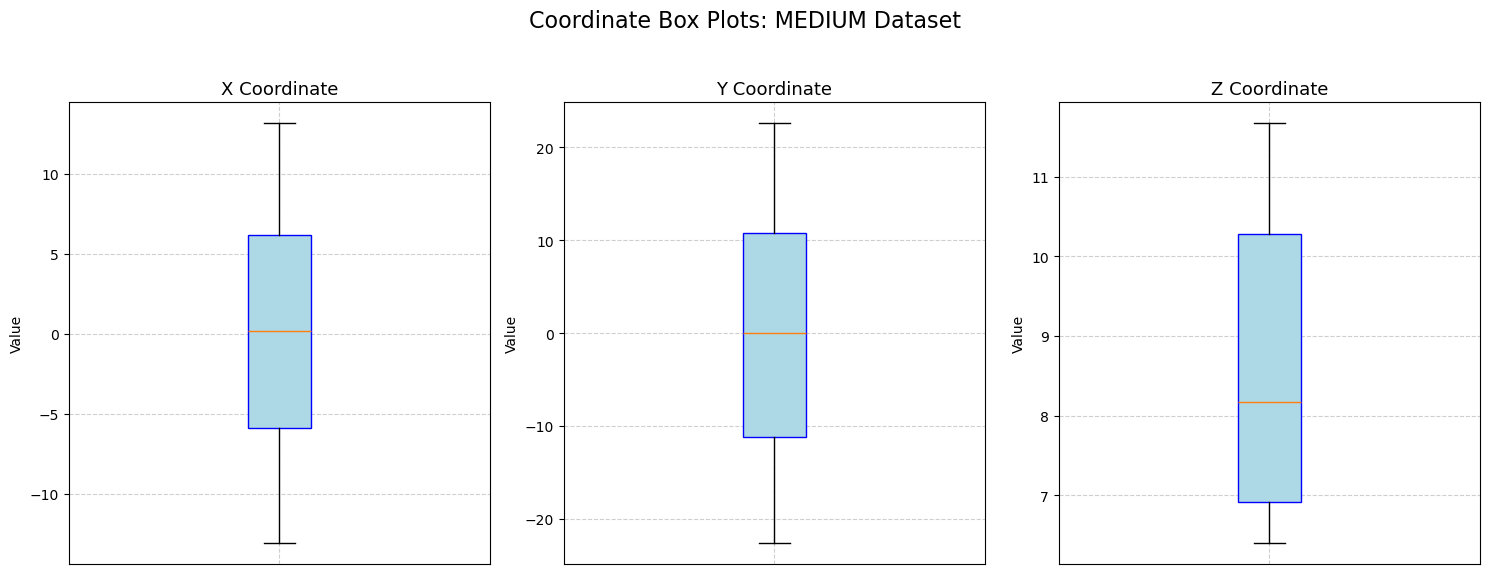

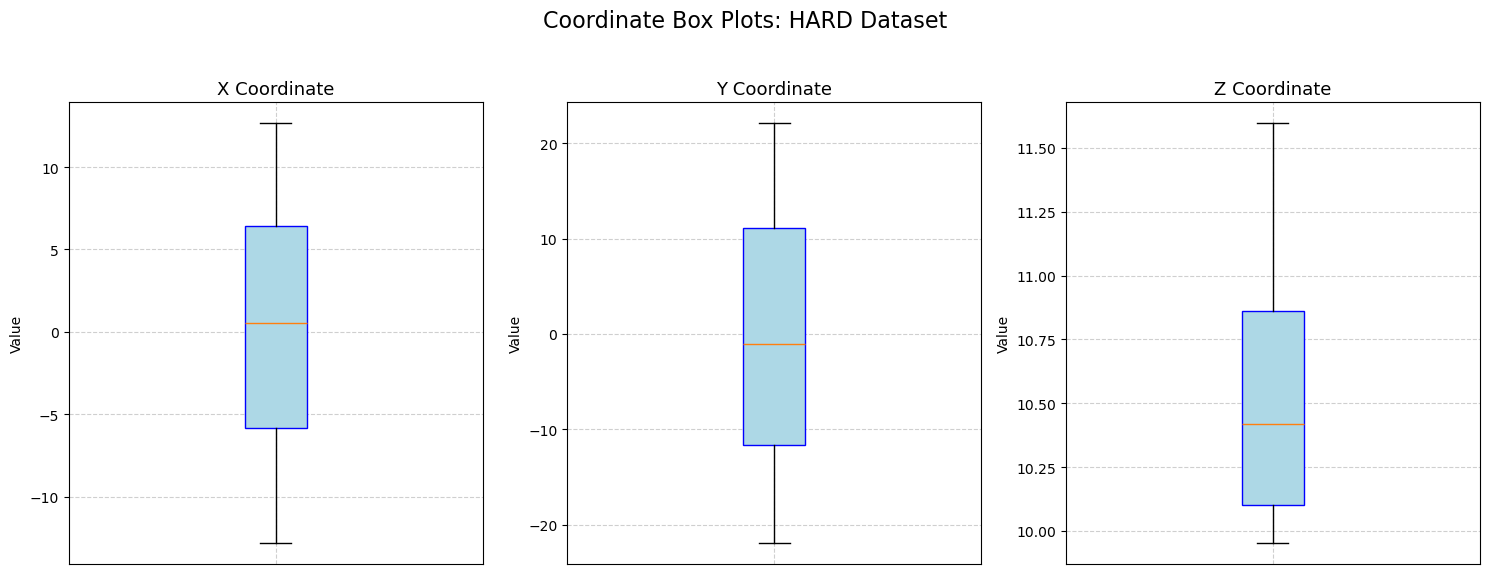

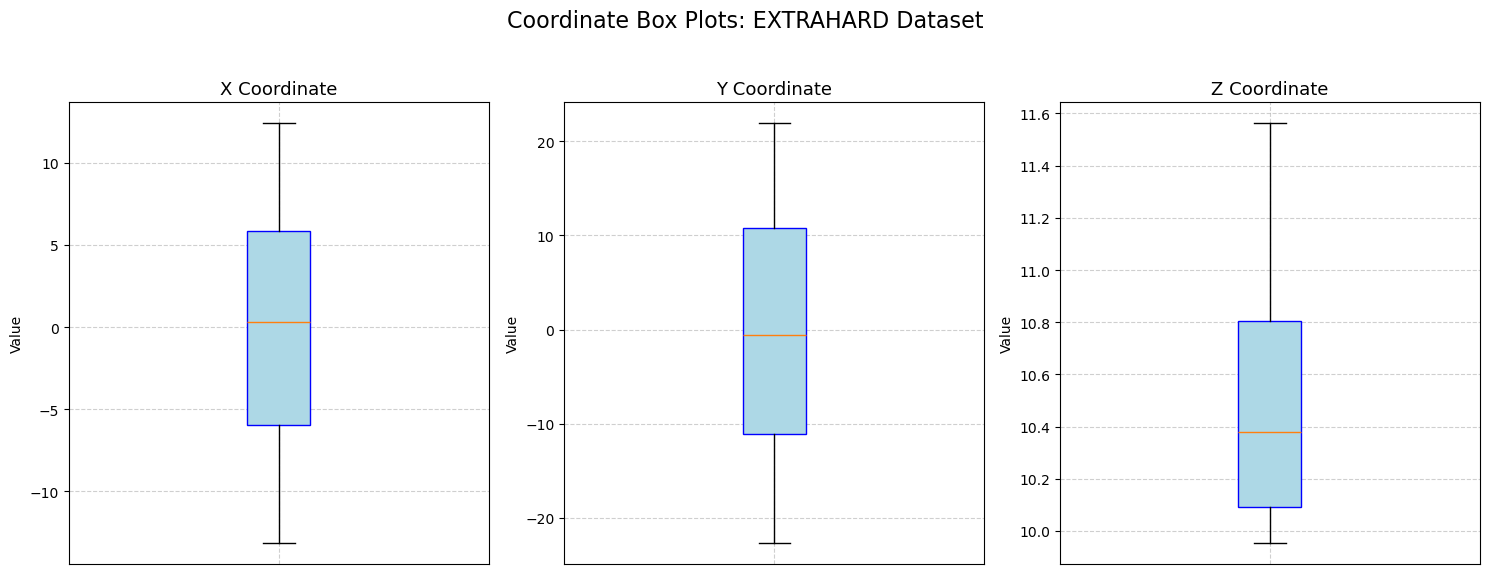

In [21]:
print("\n--- Box Plots of Coordinates: Spotting Outliers and Range ---")
print("These plots highlight the spread of points and reveal extreme outliers in each dimension, which might be noise.")

for name, df in lidar_dataframes.items():
    if not df.empty:
        fig, axes = plt.subplots(1, 3, figsize=(15, 6))
        fig.suptitle(f'Coordinate Box Plots: {name.upper()} Dataset', fontsize=16)

        for i, col in enumerate(['x', 'y', 'z']):
            axes[i].boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', edgecolor='blue'))
            axes[i].set_title(f'{col.upper()} Coordinate', fontsize=13)
            axes[i].set_ylabel('Value')
            axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Hide x-axis ticks/labels
            axes[i].grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print(f"Skipping box plots for empty dataset: {name.upper()}")


--- Histograms: How are points distributed along each axis? ---
Histograms show us where points are most dense and reveal any multi-modal distributions (e.g., multiple wires clustered along an axis).

Dataset: EASY


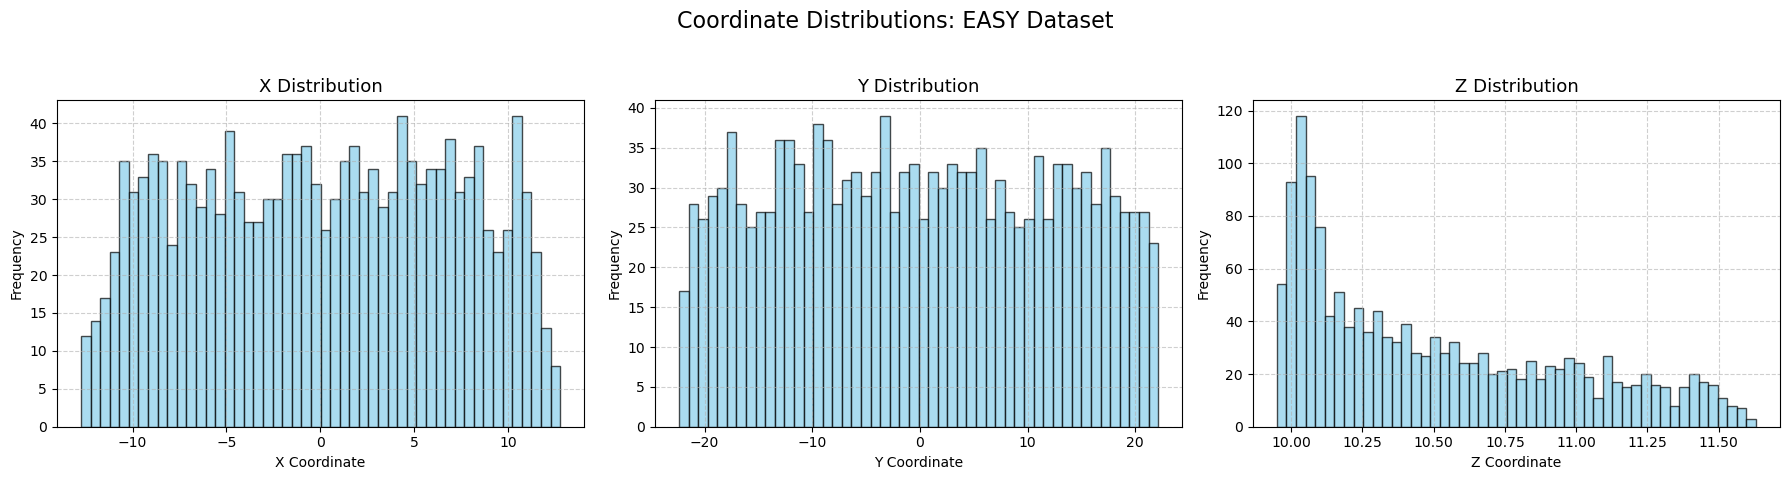


Dataset: MEDIUM


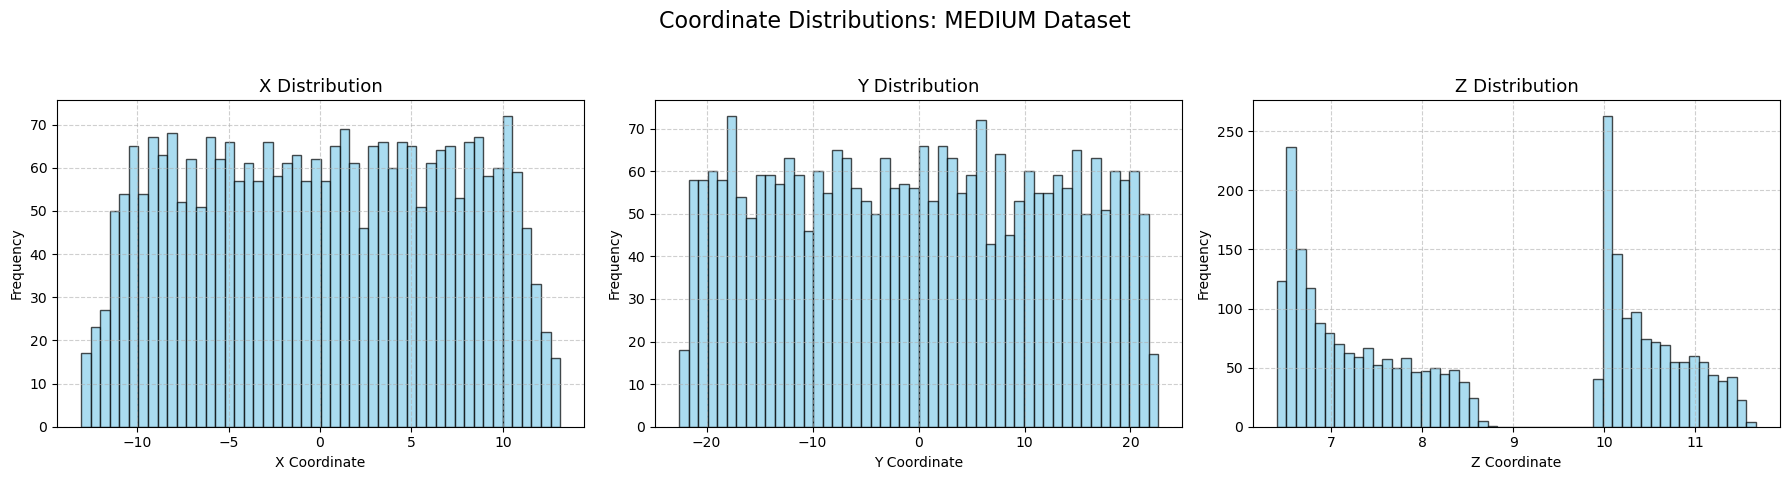


Dataset: HARD


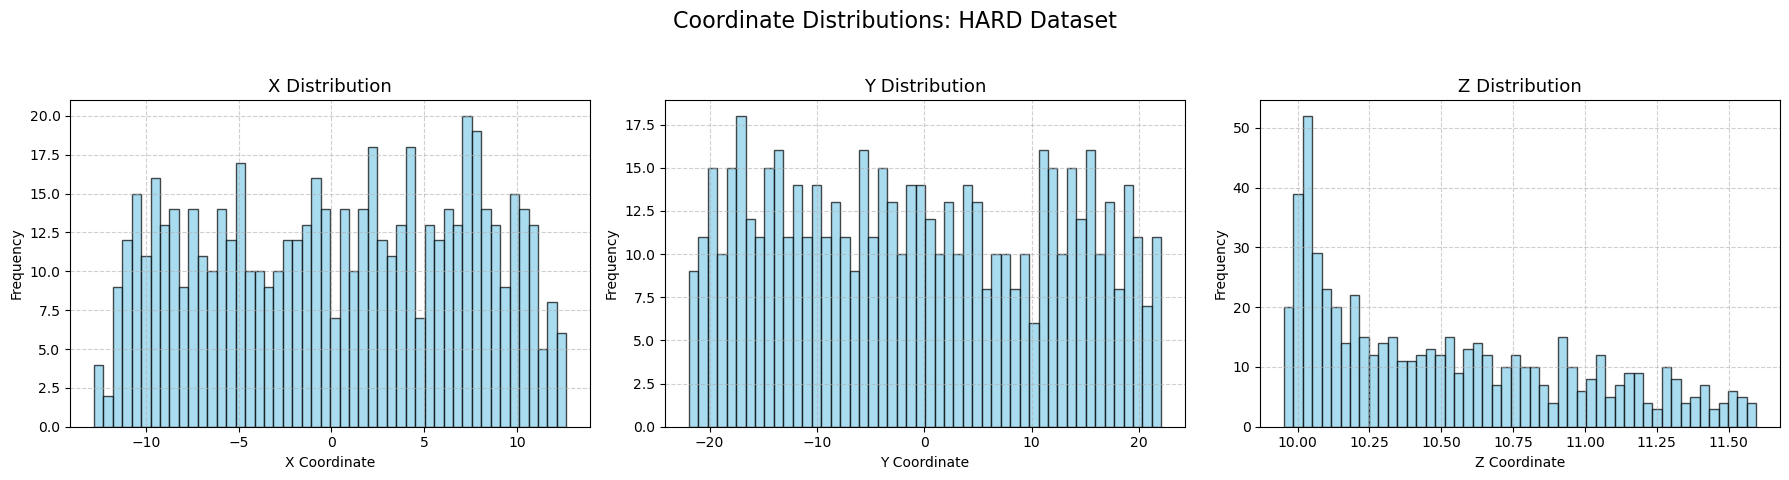


Dataset: EXTRAHARD


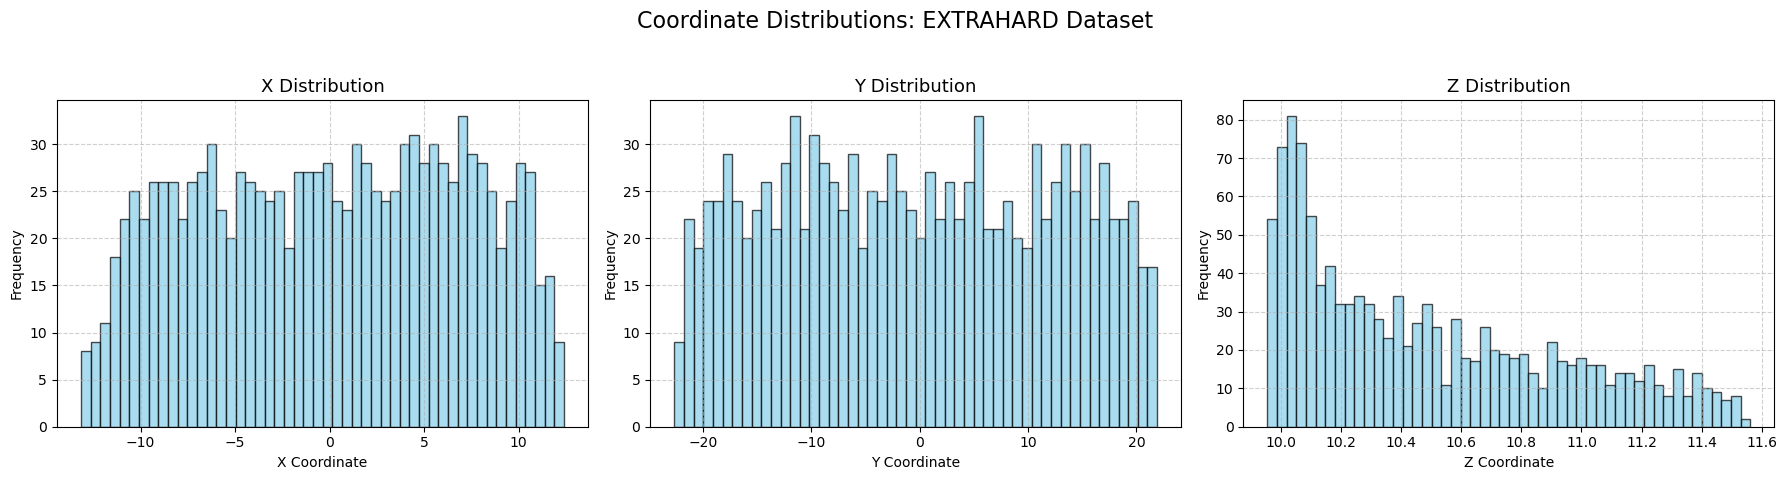

In [22]:
print("\n--- Histograms: How are points distributed along each axis? ---")
print("Histograms show us where points are most dense and reveal any multi-modal distributions (e.g., multiple wires clustered along an axis).")

for name, df in lidar_dataframes.items():
    if not df.empty:
        print(f"\nDataset: {name.upper()}")
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f'Coordinate Distributions: {name.upper()} Dataset', fontsize=16)

        for i, col in enumerate(['x', 'y', 'z']):
            axes[i].hist(df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'{col.upper()} Distribution', fontsize=13)
            axes[i].set_xlabel(f'{col.upper()} Coordinate')
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print(f"Skipping distribution plots for empty dataset: {name.upper()}")

In [23]:
def simple_z_outlier_removal(df, z_threshold_std=3.0):
    """
    Removes points that are statistical outliers based on their Z-coordinate (elevation).
    A point is considered an outlier if its Z-value is beyond `z_threshold_std`
    standard deviations from the mean Z-value.
    """
    if df.empty:
        return df
    z_mean = df['z'].mean()
    z_std = df['z'].std()
    if z_std == 0: # Avoid division by zero if all Z values are identical
        return df
    df_filtered = df[(np.abs(df['z'] - z_mean) / z_std) < z_threshold_std].copy()
    print(f"  Removed {len(df) - len(df_filtered)} points ({(len(df) - len(df_filtered))/len(df)*100:.2f}%) based on Z-outlier removal.")
    return df_filtered


In [24]:
# --- Let's apply this to 'hard' and 'extrahard' datasets as a test ---
processed_lidar_dataframes = lidar_dataframes.copy()

print("\nApplying Z-Outlier Removal (z_threshold_std=3.0) for 'hard' and 'extrahard':")
for name in ['hard', 'extrahard']:
    if name in processed_lidar_dataframes and not processed_lidar_dataframes[name].empty:
        print(f"\nProcessing {name.upper()} dataset...")
        original_len = len(processed_lidar_dataframes[name])
        processed_df = simple_z_outlier_removal(processed_lidar_dataframes[name], z_threshold_std=3.0)
        processed_lidar_dataframes[name] = processed_df
        print(f"  {name.upper()} after outlier removal: {len(processed_df):,} points (from {original_len:,})")
    else:
        print(f"  Skipping {name.upper()}: Not loaded or empty.")

print("\n--- Visualizing Impact of Preprocessing (Plotly for 'hard' and 'extrahard') ---")
print("Let's see if our simple Z-outlier removal visibly cleans up the point clouds.")


Applying Z-Outlier Removal (z_threshold_std=3.0) for 'hard' and 'extrahard':

Processing HARD dataset...
  Removed 0 points (0.00%) based on Z-outlier removal.
  HARD after outlier removal: 601 points (from 601)

Processing EXTRAHARD dataset...
  Removed 0 points (0.00%) based on Z-outlier removal.
  EXTRAHARD after outlier removal: 1,201 points (from 1,201)

--- Visualizing Impact of Preprocessing (Plotly for 'hard' and 'extrahard') ---
Let's see if our simple Z-outlier removal visibly cleans up the point clouds.


In [25]:
for name in ['hard', 'extrahard']:
    if name in processed_lidar_dataframes and not processed_lidar_dataframes[name].empty:
        df_original = lidar_dataframes[name]
        df_processed = processed_lidar_dataframes[name]

        fig = go.Figure()
        # Original points (lighter color)
        fig.add_trace(go.Scatter3d(
            x=df_original['x'], y=df_original['y'], z=df_original['z'],
            mode='markers',
            marker=dict(size=1.5, opacity=0.3, color='grey'),
            name=f'Original {name.upper()}'
        ))
        # Processed points (main color)
        fig.add_trace(go.Scatter3d(
            x=df_processed['x'], y=df_processed['y'], z=df_processed['z'],
            mode='markers',
            marker=dict(size=2, opacity=0.8, color='purple'),
            name=f'Processed {name.upper()}'
        ))

        fig.update_layout(
            title=f'Comparison: Original vs. Z-Outlier Removed {name.upper()}',
            scene=dict(
                xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
                aspectmode='data'
            ),
            height=700, width=800
        )
        fig.show()
    else:
        print(f"  Cannot compare for {name.upper()}: Data not available.")

## Key Takeaways and Game Plan

After a thorough visual inspection of the LiDAR point clouds from all four datasets, here's a summary of observations and our proposed game plan for the next steps:

### General Preprocessing Stance:
Based on our current visual inspection, the wire structures appear largely coherent across all datasets, including 'hard' and 'extrahard'. While some minor noise or density variations are present, we believe that aggressive, global preprocessing steps like extensive outlier removal or explicit downsampling might not be strictly necessary as an initial step. Our strategy is to leverage robust algorithms in subsequent stages (e.g., density-based clustering, robust fitting) that can implicitly handle some level of noise. We will, however, remain agile and revisit preprocessing if performance or accuracy issues arise later in the pipeline.

### Dataset Specific Observations & Approach:

#### `easy` Dataset:
* **Observations:** This dataset exhibits exceptionally clean and clearly defined wire structures with minimal noise. The wires are well-separated, and the point density is uniform.
* **Approach:** This will serve as our ideal case, allowing us to validate the core logic of our clustering, plane fitting, and catenary modeling algorithms without the complication of significant noise or overlapping wires. No dedicated preprocessing is anticipated.

#### `medium` Dataset:
* **Observations:** The `medium` dataset shows slightly more points and wires that are in closer proximity compared to `easy`. While still quite clean, there might be subtle overlaps or less distinct boundaries between wires in certain views.
* **Approach:** The primary focus for this dataset will be the efficacy of our clustering algorithm to accurately differentiate and isolate individual wires that are close to each other. Preprocessing is not expected to be a major concern.

#### `hard` Dataset:
* **Observations:** In the `hard` dataset, we observe a noticeable increase in point density and some background 'fuzz' or minor scattered points that could be considered noise. Wires are denser and might show more complex arrangements or closer interactions. However, the fundamental wire structures are still discernible.
* **Approach:** We will rely on our clustering algorithm's ability to handle higher density and some degree of noise. If simple clustering struggles, we might explore more targeted, local noise reduction *within* the clustering or fitting phases, rather than a global pre-filter.

#### `extrahard` Dataset:
* **Observations:** As expected, the `extrahard` dataset presents the highest density of points and the most challenging visual complexity. There's significant clutter and wires appear highly intertwined in places. Despite this, the underlying catenary shapes can still be vaguely perceived. The sheer volume of points could pose a performance challenge.
* **Approach:** This dataset will be the ultimate test of our pipeline's robustness and efficiency. We anticipate that a well-tuned density-based clustering algorithm will be critical here. We will closely monitor computational performance and might consider strategic downsampling *if* it becomes a bottleneck for clustering or fitting, ensuring structure is preserved. Robust fitting methods will be paramount.


In [31]:
print("\n--- Unifying all LiDAR datasets into a single DataFrame for downstream processing ---")
print("This creates a comprehensive dataset, with each point tagged by its original file.")

all_dfs_for_merge = []
for name, df in lidar_dataframes.items():
    if not df.empty:
        # Create a copy to ensure we don't modify the original DataFrames in `lidar_dataframes`
        df_copy = df.copy()
        df_copy['original_file'] = name # Add the identifier column
        all_dfs_for_merge.append(df_copy)
        print(f"  Including '{name}' data ({len(df_copy):,} points) in the combined dataset.")
    else:
        print(f"  Skipping empty or failed-to-load dataset for merge: {name}.")

if all_dfs_for_merge:
    merged_lidar_df = pd.concat(all_dfs_for_merge, ignore_index=True)
    print(f"\nSuccessfully created the unified dataset. Total points: {len(merged_lidar_df):,}")
    print(f"Columns in unified DataFrame: {merged_lidar_df.columns.tolist()}")
    print("\nFirst 5 rows of the unified DataFrame (showing 'original_file' tag):")
    print(merged_lidar_df.head())
    print("\nPoint counts by original file within the unified dataset:")
    print(merged_lidar_df['original_file'].value_counts())
else:
    merged_lidar_df = pd.DataFrame()
    print("\nNo dataframes were available to merge into a unified dataset.")

print("\nUnified dataset (`merged_lidar_df`) is now ready for clustering and other processing steps!")


--- Unifying all LiDAR datasets into a single DataFrame for downstream processing ---
This creates a comprehensive dataset, with each point tagged by its original file.
  Including 'easy' data (1,502 points) in the combined dataset.
  Including 'medium' data (2,803 points) in the combined dataset.
  Including 'hard' data (601 points) in the combined dataset.
  Including 'extrahard' data (1,201 points) in the combined dataset.

Successfully created the unified dataset. Total points: 6,107
Columns in unified DataFrame: ['x', 'y', 'z', 'original_file']

First 5 rows of the unified DataFrame (showing 'original_file' tag):
           x          y          z original_file
0   6.196634 -13.157755  10.582272          easy
1 -10.440643  17.264460  10.926065          easy
2   2.977432  -3.552676  10.072814          easy
3   5.924494 -10.974960  10.342501          easy
4  -7.062873  12.850664  10.557997          easy

Point counts by original file within the unified dataset:
original_file
medium

In [34]:
# --- NEW CELL: Define DBSCAN Clustering Function ---
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # For estimate_dbscan_eps

def perform_dbscan_clustering(points_df: pd.DataFrame, eps: float, min_samples: int) -> pd.DataFrame:
    """
    Performs DBSCAN clustering on 3D LiDAR points (x, y, z).

    DBSCAN is a density-based clustering algorithm that can discover clusters
    of arbitrary shape in spatial data with noise.

    Args:
        points_df (pd.DataFrame): A DataFrame with 'x', 'y', 'z' columns
                                  representing the 3D LiDAR points.
        eps (float): The maximum distance between two samples for one to be
                     considered as in the neighborhood of the other. This is
                     the most critical DBSCAN parameter for point cloud data,
                     representing the maximum radius of the neighborhood.
        min_samples (int): The number of samples (or total weight) in a neighborhood
                           for a point to be considered as a core point. This
                           controls the minimum size of a cluster.

    Returns:
        pd.DataFrame: The input DataFrame with an additional 'cluster_id' column.
                      Noise points are assigned a cluster_id of -1.

    Raises:
        ValueError: If the input DataFrame does not contain 'x', 'y', 'z' columns.
    """
    required_columns = ['x', 'y', 'z']
    if not all(col in points_df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in points_df.columns]
        raise ValueError(f"Input DataFrame is missing required columns: {missing_cols}. Expected 'x', 'y', 'z'.")

    points = points_df[required_columns].values

    print(f"  Starting DBSCAN clustering with eps={eps:.4f}, min_samples={min_samples}...")
    start_time = time.time()
    db = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = db.fit_predict(points)
    end_time = time.time()
    print(f"  DBSCAN finished in {end_time - start_time:.2f} seconds.")

    result_df = points_df.copy()
    result_df['cluster_id'] = clusters
    n_clusters = result_df['cluster_id'].nunique() - (1 if -1 in result_df['cluster_id'].unique() else 0)
    print(f"  DBSCAN found {n_clusters} clusters.")
    if -1 in result_df['cluster_id'].unique():
        noise_points = (result_df['cluster_id'] == -1).sum()
        print(f"  {noise_points:,} points identified as noise (cluster_id = -1).")
    print(f"  Cluster ID counts (first 10, including noise):\n{result_df['cluster_id'].value_counts().sort_index().head(10).to_string()}")

    return result_df

print("`perform_dbscan_clustering` function defined.")

`perform_dbscan_clustering` function defined.


In [35]:
# --- NEW CELL: Define HDBSCAN Clustering Function ---
import hdbscan # Make sure you have this installed: pip install hdbscan

def perform_hdbscan_clustering(points_df: pd.DataFrame, min_cluster_size: int, min_samples: int = None) -> pd.DataFrame:
    """
    Performs HDBSCAN clustering on 3D LiDAR points (x, y, z).

    HDBSCAN is a powerful density-based clustering algorithm that can find clusters
    of varying densities and is robust to noise. It does not require an 'eps' parameter.

    Args:
        points_df (pd.DataFrame): A DataFrame with 'x', 'y', 'z' columns
                                  representing the 3D LiDAR points.
        min_cluster_size (int): The smallest size grouping that a cluster can be.
                                Similar to min_samples in DBSCAN for overall cluster size.
        min_samples (int, optional): The number of samples in a neighborhood for a point
                                     to be considered a core point. Defaults to `min_cluster_size`.
                                     Higher values lead to more conservative clustering (more noise).

    Returns:
        pd.DataFrame: The input DataFrame with an additional 'cluster_id' column.
                      Noise points are assigned a cluster_id of -1.

    Raises:
        ValueError: If the input DataFrame does not contain 'x', 'y', 'z' columns.
    """
    required_columns = ['x', 'y', 'z']
    if not all(col in points_df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in points_df.columns]
        raise ValueError(f"Input DataFrame is missing required columns: {missing_cols}. Expected 'x', 'y', 'z'.")

    points = points_df[required_columns].values

    print(f"  Starting HDBSCAN clustering with min_cluster_size={min_cluster_size}, min_samples={min_samples if min_samples is not None else min_cluster_size}...")
    start_time = time.time()
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    clusters = clusterer.fit_predict(points)
    end_time = time.time()
    print(f"  HDBSCAN finished in {end_time - start_time:.2f} seconds.")

    result_df = points_df.copy()
    result_df['cluster_id'] = clusters
    n_clusters = result_df['cluster_id'].nunique() - (1 if -1 in result_df['cluster_id'].unique() else 0)
    print(f"  HDBSCAN found {n_clusters} clusters.")
    if -1 in result_df['cluster_id'].unique():
        noise_points = (result_df['cluster_id'] == -1).sum()
        print(f"  {noise_points:,} points identified as noise (cluster_id = -1).")
    print(f"  Cluster ID counts (first 10, including noise):\n{result_df['cluster_id'].value_counts().sort_index().head(10).to_string()}")

    return result_df

print("`perform_hdbscan_clustering` function defined.")

`perform_hdbscan_clustering` function defined.


In [36]:
# --- NEW CELL: Define DBSCAN `eps` Estimation Function (K-Distance Graph) ---

def estimate_dbscan_eps(points_df: pd.DataFrame, n_neighbors: int = 5) -> float:
    """
    Estimates a suitable 'eps' value for DBSCAN using the K-distance graph method.
    This method plots the distance of the k-th nearest neighbor for each point,
    and a significant 'knee' or elbow in the graph can suggest an appropriate 'eps'.

    Args:
        points_df (pd.DataFrame): A DataFrame with 'x', 'y', 'z' columns.
        n_neighbors (int): The number of neighbors to consider for distance calculation (k in k-distance).
                           A common value is min_samples - 1.

    Returns:
        float: The estimated eps value (suggested, manual inspection of plot is recommended).
    """
    required_columns = ['x', 'y', 'z']
    if not all(col in points_df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame is missing required columns: {points_df.columns.tolist()}. Expected 'x', 'y', 'z'.")

    points = points_df[required_columns].values
    print(f"  Estimating DBSCAN 'eps' using K-distance graph (k={n_neighbors})...")

    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(points)
    distances, indices = nbrs.kneighbors(points)

    k_distances = np.sort(distances[:, n_neighbors-1], axis=0)

    plt.figure(figsize=(12, 6))
    plt.plot(k_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"Distance to {n_neighbors}-th nearest neighbor (k-distance)")
    plt.title(f"K-Distance Graph for DBSCAN 'eps' Estimation (k={n_neighbors})")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print(f"  Please inspect the K-distance graph above. Look for a 'knee' or 'elbow' point.")
    print(f"  The Y-value at this elbow is a good candidate for 'eps'.")
    # A simple way to suggest a value (e.g., 90th percentile, but manual inspection is better)
    suggested_eps = np.percentile(k_distances, 90)
    print(f"  A heuristic-based suggestion for 'eps' (e.g., 90th percentile): {suggested_eps:.4f}")
    return suggested_eps

print("`estimate_dbscan_eps` function defined.")

`estimate_dbscan_eps` function defined.



--- Defining Clustering Parameters ---
These are the hyperparameters for DBSCAN and HDBSCAN. Tuning these is crucial!
DBSCAN: Running K-distance estimation with k=10 to guide 'eps' selection...
  Estimating DBSCAN 'eps' using K-distance graph (k=10)...


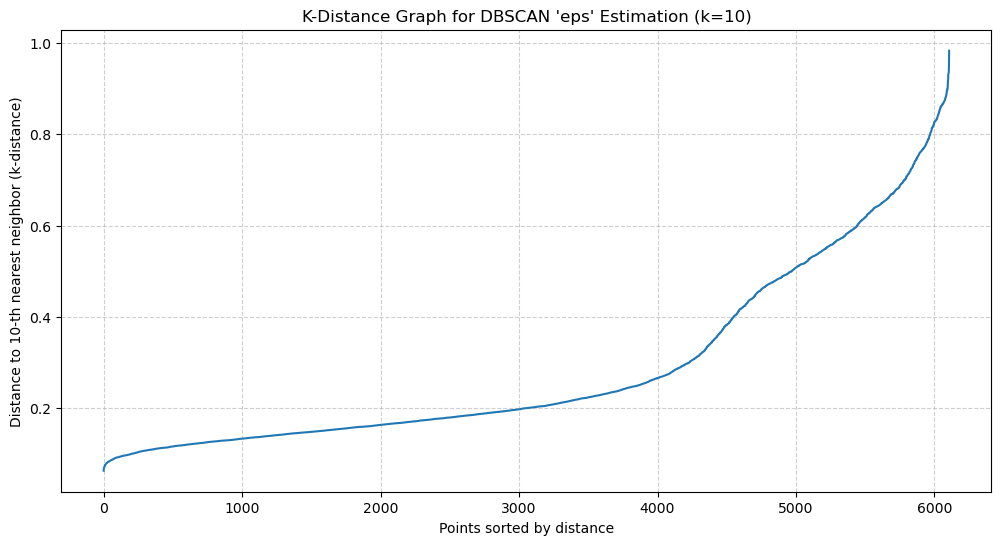

  Please inspect the K-distance graph above. Look for a 'knee' or 'elbow' point.
  The Y-value at this elbow is a good candidate for 'eps'.
  A heuristic-based suggestion for 'eps' (e.g., 90th percentile): 0.6167
DBSCAN Parameters set: eps=0.6167, min_samples=10
HDBSCAN Parameters set: min_cluster_size=15

Clustering parameters defined. Ready to run the clustering algorithms!


In [38]:
# --- NEW CELL: Define Clustering Parameters ---

print("\n--- Defining Clustering Parameters ---")
print("These are the hyperparameters for DBSCAN and HDBSCAN. Tuning these is crucial!")

# --- DBSCAN Parameters ---
# min_samples: A common heuristic is 2 * dimensionality (2*3=6) or slightly higher (e.g., 10-20)
# This should be your target `min_samples` for DBSCAN.
dbscan_min_samples_candidate = 10
print(f"DBSCAN: Running K-distance estimation with k={dbscan_min_samples_candidate} to guide 'eps' selection...")
estimated_eps = estimate_dbscan_eps(merged_lidar_df, n_neighbors=dbscan_min_samples_candidate) # Calls the function defined above

# Adjust `chosen_dbscan_eps` after inspecting the K-distance graph!
chosen_dbscan_eps = estimated_eps # Start with the estimate, then refine manually if needed
chosen_dbscan_min_samples = dbscan_min_samples_candidate # Keep consistent with k for now

print(f"DBSCAN Parameters set: eps={chosen_dbscan_eps:.4f}, min_samples={chosen_dbscan_min_samples}")

# --- HDBSCAN Parameters ---
# min_cluster_size: Smallest cluster size to consider a wire (e.g., 10-20 points for a wire segment)
# min_samples: Optional. Defaults to min_cluster_size. Set higher for more conservative clustering (more noise points).
chosen_hdbscan_min_cluster_size = 15 # Example: Adjust this based on perceived wire thickness/density
chosen_hdbscan_min_samples = None # Let it default to min_cluster_size, or set higher (e.g., 20)

print(f"HDBSCAN Parameters set: min_cluster_size={chosen_hdbscan_min_cluster_size}" +
      (f", min_samples={chosen_hdbscan_min_samples}" if chosen_hdbscan_min_samples is not None else ""))

print("\nClustering parameters defined. Ready to run the clustering algorithms!")

In [43]:
# --- EXISTING CELL: DBSCAN Clustering Test and Visualization ---
import plotly.express as px
import time as time

print("\n--- Applying DBSCAN Clustering ---")
# ... (rest of the print statements and parameter setup) ...

if not merged_lidar_df.empty:
    # ... (K-distance estimation and parameters) ...

    try:
        clustered_df_dbscan = perform_dbscan_clustering(merged_lidar_df.copy(),
                                                        eps=0.8,
                                                        min_samples=chosen_dbscan_min_samples)
        print("\nDBSCAN clustering completed. Let's visualize the results to assess wire separation!")

        # --- Visualize DBSCAN Clustered Results (Plotly Interactive) ---
        print("\n--- Visualizing DBSCAN Clusters ---") # <-- THIS PRINT SHOULD APPEAR
        print("Noise points (cluster_id = -1) will typically be grey or very faint.")

        if not clustered_df_dbscan.empty:
            fig_dbscan = px.scatter_3d(clustered_df_dbscan, x='x', y='y', z='z',
                                       color='cluster_id',
                                       hover_data=['original_file'],
                                       opacity=0.8,
                                       size_max=3,
                                       title=f'DBSCAN Clustered LiDAR Points (eps={0.8:.4f}, min_samples={chosen_dbscan_min_samples})'
                                      )
            for trace in fig_dbscan.data:
                if trace.name == '-1':
                    trace.marker.color = 'lightgray'
                    trace.marker.opacity = 0.1

            fig_dbscan.update_layout(
                scene=dict(
                    xaxis_title='X Coordinate',
                    yaxis_title='Y Coordinate',
                    zaxis_title='Z Coordinate',
                    aspectmode='data'
                ),
                height=800,
                width=900,
            )
            fig_dbscan.show() # <-- THIS IS THE CRUCIAL LINE FOR PLOTLY DISPLAY
        else:
            print("DBSCAN clustered DataFrame is empty. No visualization possible.")

    except Exception as e:
        print(f"Error during DBSCAN clustering: {e}")
        print("Please check your `eps` and `min_samples` parameters, and ensure the `perform_dbscan_clustering` function is correctly defined above.")

else:
    print("Cannot perform DBSCAN clustering: `merged_lidar_df` is empty.")

print("\nDBSCAN test complete. Analyze the plot: Are wires separated well? Is there too much noise?")


--- Applying DBSCAN Clustering ---
  Starting DBSCAN clustering with eps=0.8000, min_samples=10...
  DBSCAN finished in 0.10 seconds.
  DBSCAN found 5 clusters.
  23 points identified as noise (cluster_id = -1).
  Cluster ID counts (first 10, including noise):
cluster_id
-1      23
 0    4534
 1    1507
 2      16
 3      14
 4      13

DBSCAN clustering completed. Let's visualize the results to assess wire separation!

--- Visualizing DBSCAN Clusters ---
Noise points (cluster_id = -1) will typically be grey or very faint.



DBSCAN test complete. Analyze the plot: Are wires separated well? Is there too much noise?
